In [1]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import ProbabilisticParcellation.functional_profiles as fp
from Functional_Fusion.dataset import *
import matplotlib.pyplot as plt
import string
import PcmPy as pcm
from copy import deepcopy
import torch as pt



base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Load profile data and model

In [4]:
atlas = 'MNISymC2'

# load model
mname = f'/Models_03/NettekovenSym32_space-{atlas}'
fileparts = mname.split('/')
split_mn = fileparts[-1].split('_')
info, model = ut.load_batch_best(mname)


# load labels and cmap
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              f'{fileparts[-1].split("_")[0]}.lut')
labels=labels[1:]

# load profile
profile = pd.read_csv(
    f'{ut.model_dir}/Atlases/Profiles/{fileparts[-1].split("_")[0]}_profile.tsv', sep="\t"
)


In [5]:
# Normalize profile
profile_mat = profile[labels].to_numpy()
profile_norm = profile_mat / \
    np.sqrt(np.sum(profile_mat**2, axis=1).reshape(-1, 1))

# Get correlation of normalized profile between all regions
# Average the two sides
profile_sim = profile_norm[:, :model.K//2] + profile_norm[:, model.K//2:]
functional_sim_norm = profile_sim.T @ profile_sim


## Similarity Matrices
Spatial, Functional and Functional normalized

In [8]:
# Get similarity matrices
l, functional_sim, spatial_sim, ind = cl.similarity_matrices(mname)


In [15]:
l

array(['A1L', 'A2L', 'D1L', 'D2L', 'D3L', 'D4L', 'I1L', 'I2L', 'M1L',
       'M2L', 'M3L', 'M4L', 'S1L', 'S2L', 'S3L', 'S4L'], dtype='<U3')

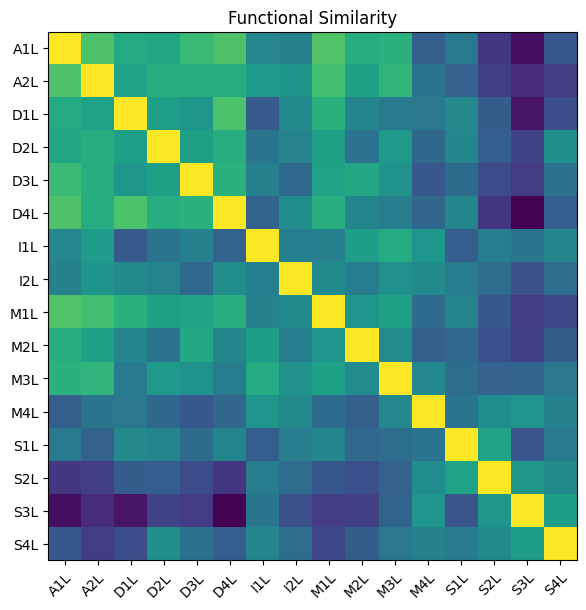

In [17]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 2, 1)
ax.imshow(functional_sim)
ax.set_title('Functional Similarity')
ax.set_xticks(np.arange(len(l)))
ax.set_yticks(np.arange(len(l)))
ax.set_xticklabels(l)
_ = ax.set_yticklabels(l)
# Rotate the tick labels and set their alignment.
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")


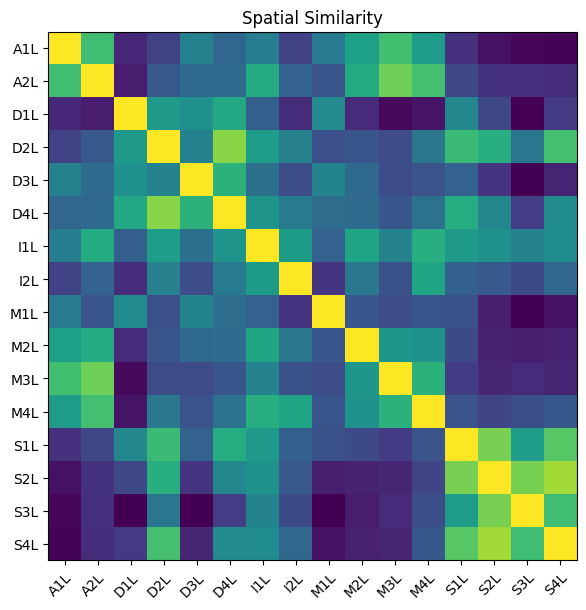

In [18]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 2, 1)
ax.imshow(spatial_sim)
ax.set_title('Spatial Similarity')
ax.set_xticks(np.arange(len(l)))
ax.set_yticks(np.arange(len(l)))
ax.set_xticklabels(l)
_ = ax.set_yticklabels(l)
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


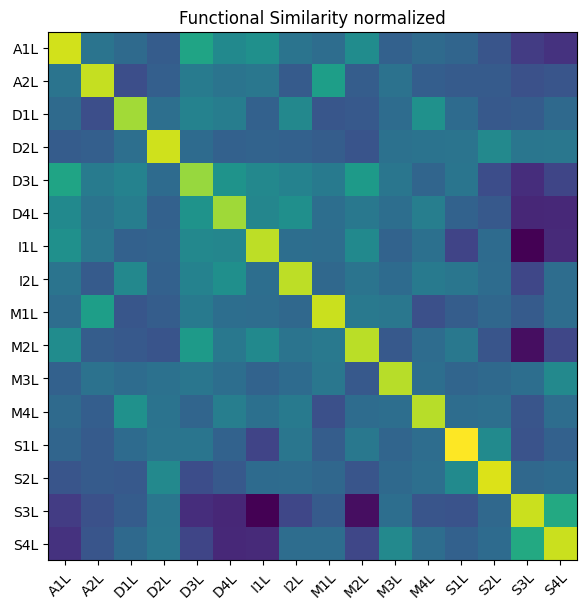

In [19]:
# Show normalized matrix
plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 2, 1)
ax.imshow(functional_sim_norm)
ax.set_title('Functional Similarity normalized')
ax.set_xticks(np.arange(len(l)))
ax.set_yticks(np.arange(len(l)))
ax.set_xticklabels(l)
_ = ax.set_yticklabels(l)
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
